In [1]:
import json 
import pandas as pd
from urllib.request import urlopen
from disCap import finmod as FM
from disCap import disCap
import matplotlib.pyplot as plt
import numpy as np

'''
financialmodelingprep ask that the API key not be shared.  I keep mine in a json
file.  The API key is available and free for use provided by registration at 
the site, it is to not be shared or left in git. 
'''
api_key = None
with open('../../.credentials/credentials.json') as f:
  api_keys = json.load(f)
api_key = api_keys['fiancialmod']

In [2]:
symbols = ['ETHUSD','TMUS','AMD', 'AMT', 'LMND', 'PLL', 'SQM', 'ALB', 'SE']
dfx = FM.portfolio_data(symbols, api_key)
dfx.head(10)

Reading ETHUSD and writing to archive
Symbol: ETHUSD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading TMUS and writing to archive
Symbol: TMUS.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading AMD and writing to archive
Symbol: AMD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading AMT and writing to archive
Symbol: AMT.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading LMND and writing to archive
Symbol: LMND.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading PLL and writing to archive
Symbol: PLL.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading SQM and writing to archive
Symbol: SQM.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ALB and writing to archive
Symbol: ALB.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading SE and writing to archive
Symbol: SE.  Keys: dict_keys(['symbol', 'historical'])
continue...



,symbol,close,prev_close,maxmed10,maxmed30,maxmed60,maxmed120,maxmed240
0,ETHUSD,2411.145264,2364.751709,2388.420777,2118.378906,1823.449341,1927.567566,638.290833
1,TMUS,132.120000,130.550000,131.129997,130.065002,126.309998,133.069999,131.899994
2,AMD,81.610000,79.270000,80.650001,81.819999,85.055001,92.300003,96.379997
3,AMT,252.180000,252.670000,247.850000,242.345002,223.959999,232.289993,252.320007
4,LMND,89.750000,80.980000,88.424999,93.845001,129.150002,155.635002,105.035000
5,PLL,67.570000,63.680000,67.134999,69.489998,79.120002,58.590000,34.660000
6,SQM,53.310000,53.920000,54.010000,53.680000,56.070000,57.860001,47.424999
7,ALB,153.050000,148.520000,151.270000,148.770004,155.635002,180.190002,138.899994
8,SE,241.090000,236.440000,247.779999,246.125000,249.254998,275.375000,198.570007


In [3]:
with open('data/stock_description.json') as f:
  stock_description = json.load(f)

with open('data/investments.json') as f:
  investments = json.load(f)

stock_description_df = FM.stockDescriptionAs_df(stock_description)
investments_df, todays_df = FM.investmentsAs_df(investments)

symbols = stock_description.keys()

dfx = FM.portfolio_data(symbols, api_key)
dfx['rho'] = dfx['close']/dfx['maxmed30']
dfx = dfx.sort_values(by=['rho'], ascending=False)

todays_df = todays_df.merge(dfx, how='left', on='symbol')
todays_df['value'] =  todays_df['close'] * todays_df['shares'] 
todays_df['gain'] =  todays_df['value']/todays_df['invested']

Pulling data from data/arc/20210422/AMD.json for today: AMD
Symbol: AMD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading PYPL and writing to archive
Symbol: PYPL.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading OKTA and writing to archive
Symbol: OKTA.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading AMZN and writing to archive
Symbol: AMZN.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading APPN and writing to archive
Symbol: APPN.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading WORK and writing to archive
Symbol: WORK.  Keys: dict_keys(['symbol', 'historical'])
continue...

Pulling data from data/arc/20210422/ALB.json for today: ALB
Symbol: ALB.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ADBE and writing to archive
Symbol: ADBE.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ESTC and writing to archive
Symbol: ESTC.  Keys: dict_keys(['symbol', 'historical'])
continue...



In [4]:
total_invested, total_value = sum(todays_df.invested), sum(todays_df.value)
todays_df = todays_df.merge( stock_description_df, on='symbol',how='left')
todays_df['prc_value'] = 100* ( todays_df['value']/total_value )
todays_df['prc_invested'] = 100 * (todays_df['invested']/total_value )
todays_df['basis'] = todays_df['invested']/todays_df['shares']

todays_df['rho60'] = todays_df['close']/todays_df['maxmed60']
todays_df['rho120'] = todays_df['close']/todays_df['maxmed120']
todays_df = todays_df.sort_values(by=['rho120'])


Red at gain = 0.7359396021428571.
Changes linear to yellow at 1.0.
From 1.0 to 2.8071896660000006 is green to blue shift


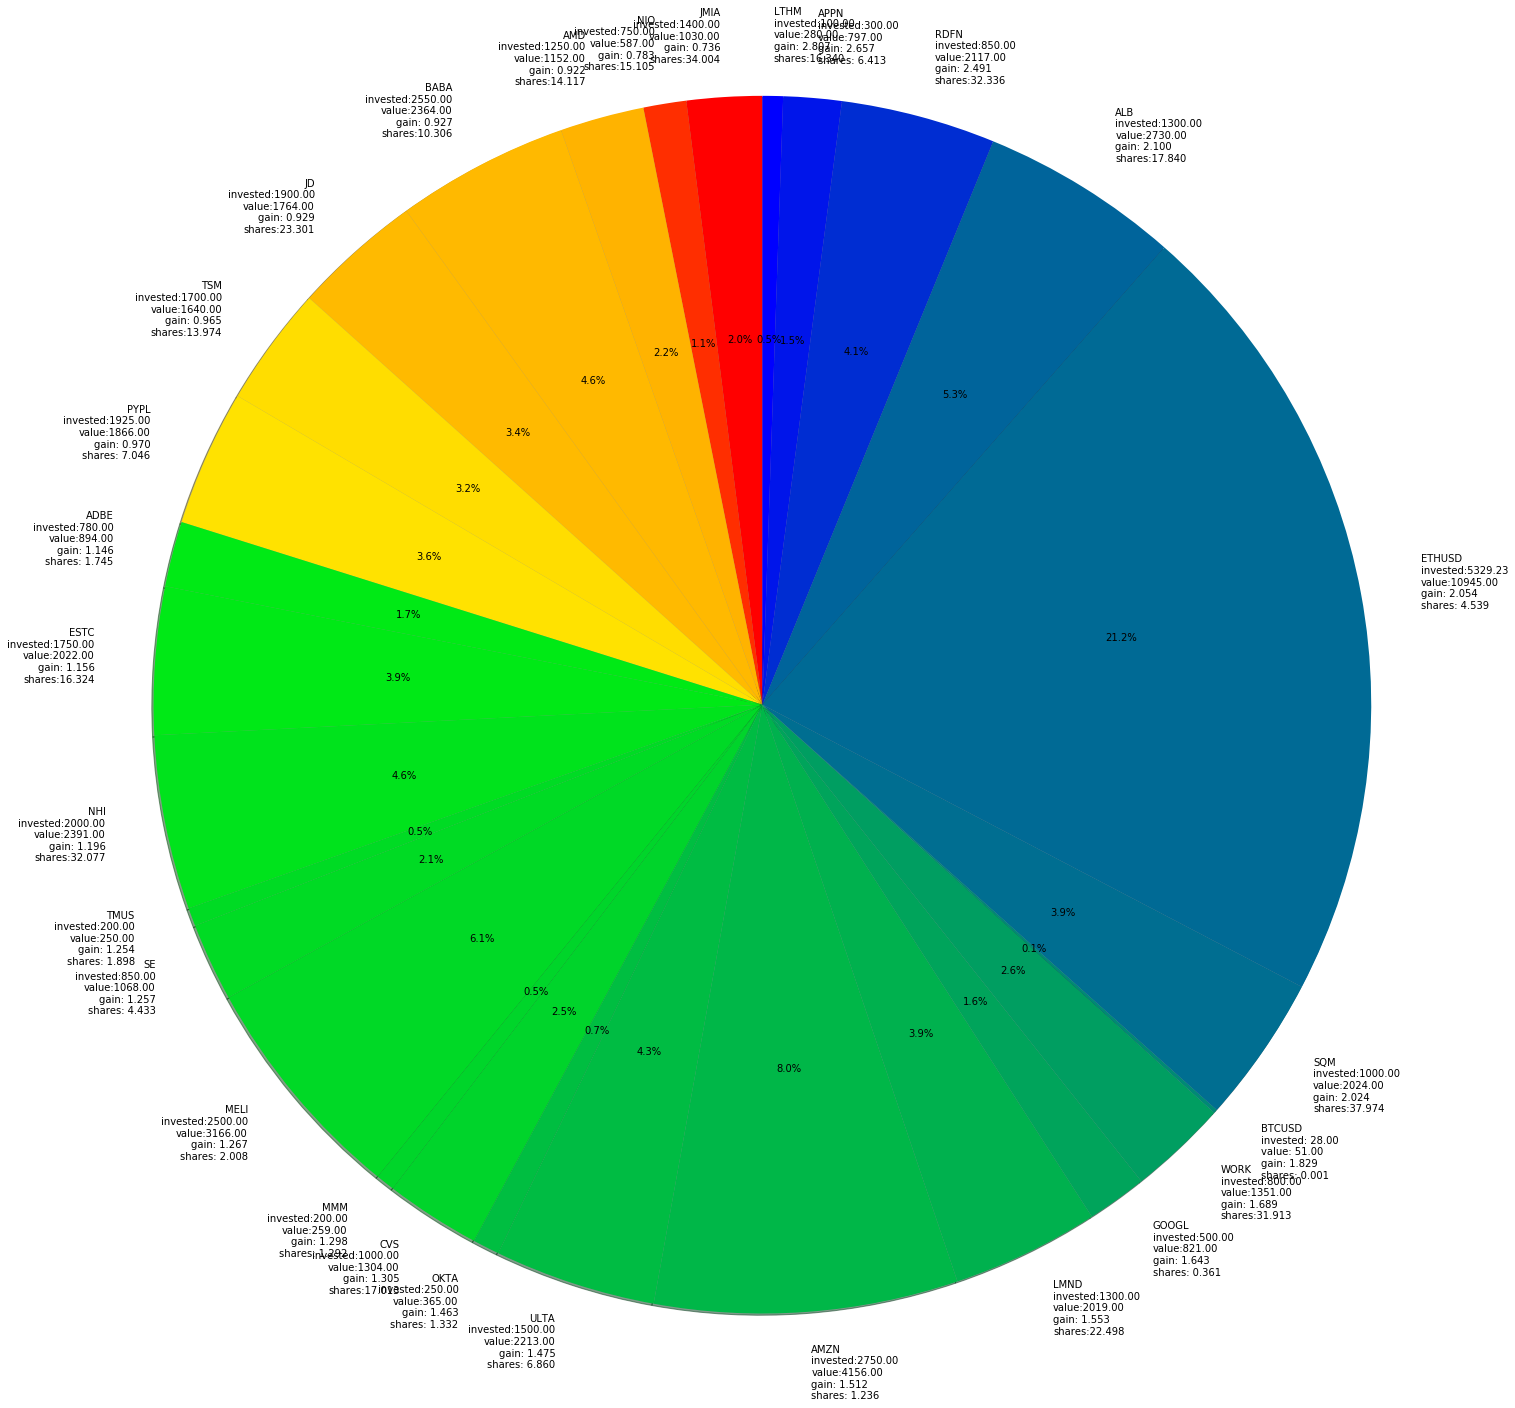



Total Invested:		36762.23
Total Value:		51638.48
Average Gain %:		  1.40
Median Gain:		  1.30


In [5]:
fig1, ax1 = plt.subplots()
todays_df = todays_df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
red_point = min( min(todays_df.gain), 0.95)
blue_point = max( max(todays_df.gain), 3)
green_point = 1.00

red_point = min(todays_df.gain)
blue_point = max(todays_df.gain)
#green_point = np.median( [1.0] )

print('Red at gain = {}.\nChanges linear to yellow at {}.\nFrom {} to {} is green to blue shift'.\
      format(red_point, green_point, green_point, blue_point))

label_ = list( map( disCap.mklab, todays_df.symbol, \
                   todays_df.invested, todays_df.value, todays_df.gain, todays_df.shares) )
ax1.pie(todays_df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(todays_df.gain,red_point,green_point,blue_point) )

plt.show()



print('\n\nTotal Invested:\t\t{0:6.2f}\nTotal Value:\t\t{1:6.2f}\nAverage Gain %:\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))
print('Median Gain:\t\t{0:6.2f}'.format(np.median(todays_df.gain)))

In [6]:
fields = ['symbol','gain','close','basis','shares','invested','value','prc_invested','prc_value','first_investment','last_investment'\
         ,'prev_close','maxmed30','rho']



fields = ['symbol','rho', 'rho60','rho120','prc_value','sector','gain','close','basis','shares','invested','value','first_investment','last_investment'\
         ,'prev_close','maxmed30']


todays_df['rho60'] = todays_df['close']/todays_df['maxmed60']
todays_df['rho120'] = todays_df['close']/todays_df['maxmed120']
todays_df = todays_df.sort_values(by=['rho120'])
todays_df[fields].head(40)

,symbol,rho,rho60,rho120,prc_value,sector,gain,close,basis,shares,invested,value,first_investment,last_investment,prev_close,maxmed30
12,JMIA,0.805744,0.630659,0.482561,1.995248,"Virtual Marketplace, Cloud Services",0.735940,30.300000,41.171857,34.003810,1400.00,1030.315443,2020.12.21,2021.03.09,28.320000,37.605000
4,APPN,0.886077,0.681770,0.567016,1.543562,"Tech, Business Processes",2.656906,124.290000,46.779978,6.413000,300.00,797.071770,2020.02.22,2020.02.22,120.320000,140.270004
13,LMND,0.956364,0.694928,0.576670,3.910318,"Tech, Insurance",1.553253,89.750000,57.781964,22.498370,1300.00,2019.228708,2020.07.29,2020.10.01,80.980000,93.845001
18,NIO,0.997308,0.786892,0.645001,1.137914,Electric Vehicle,0.783469,38.900000,49.650987,15.105440,750.00,587.601616,2020.11.09,2021.01.07,36.930000,39.005001
21,RDFN,0.974264,0.766099,0.718880,4.101012,"Tech, Real Estate",2.491412,65.490000,26.286297,32.336240,850.00,2117.700358,2020.03.05,2020.03.10,62.570000,67.220001
11,JD,0.915101,0.780498,0.725079,3.416741,"Virtual Marketplace, Cloud Services",0.928607,75.720000,81.541495,23.301020,1900.00,1764.353234,2020.10.16,2020.12.28,74.550000,82.744999
8,ESTC,1.019501,0.831907,0.750704,3.916725,"Tech, DB",1.155736,123.900000,107.204445,16.323950,1750.00,2022.537405,2020.04.21,2021.04.14,120.390000,121.529999
14,LTHM,0.991917,0.892931,0.786090,0.543624,"Li Mining, Specialty Chemicals, Battery",2.807190,17.180000,6.120000,16.339870,100.00,280.718967,2020.03.11,2020.03.11,16.400000,17.320000
15,MELI,1.020775,0.920257,0.819160,6.131813,"Virtual Marketplace, Cloud Services",1.266550,1576.990000,1245.106731,2.007860,2500.00,3166.375141,2020.08.20,2021.03.09,1533.410000,1544.895019
1,ALB,1.028769,0.983391,0.849381,5.287586,"Li Mining, Specialty Chemicals, Battery",2.100330,153.050000,72.869506,17.840110,1300.00,2730.428835,2020.02.22,2020.04.04,148.520000,148.770004


In [ ]:
todays_df = todays_df.sort_values(by=['rho'])
fields = ['symbol','prc_value','sector','gain','close','basis','rho','shares','invested','value','first_investment','last_investment'\
         ,'prev_close','maxmed30']
todays_df[fields].head(40)

In [ ]:
dfx = todays_df.sort_values(by=['prc_value'])
dfx[fields].head(40)

In [ ]:
dfx = todays_df

sector_df = dfx[['sector','invested','value']].groupby('sector').agg('sum').reset_index()
total = sum( sector_df['value'] )
sector_df['gain'] = sector_df['value']/sector_df['invested']
sector_df['percentage_value'] = 100.00*sector_df['value']/total

area_df = dfx[['area','invested','value']].groupby('area').agg('sum').reset_index()
total = sum( area_df['value'] )
area_df['gain'] = area_df['value']/area_df['invested']
area_df['percentage_value'] = 100*area_df['value']/total

In [ ]:
fig1, ax1 = plt.subplots()
df = sector_df
df = df.sort_values(by=['gain'])

label_ = list( map( disCap.mklab, df.sector, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
df.sort_values(by=['percentage_value']).head(20)

In [ ]:
fig1, ax1 = plt.subplots()
df = area_df
df = df.sort_values(by=['gain'])

red_point = min(df.gain)
blue_point = max(df.gain)
green_point = np.median( df.gain )

label_ = list( map( disCap.mklab, df.area, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
todays_df = todays_df.sort_values(by=['last_investment'])
todays_df[fields].head(40)

In [ ]:
import datetime
import pytz

local_time = pytz.timezone("America/New_York")

naive_datetime = datetime.datetime.strptime("2020-3-1 12:00:00", "%Y-%m-%d %H:%M:%S")

local_datetime = local_time.localize(naive_datetime, is_dst=None)

utc_datetime = local_datetime.astimezone(pytz.utc)

print(utc_datetime)

naive_datetime = datetime.datetime.strptime("2020-5-1 12:00:00", "%Y-%m-%d %H:%M:%S")

local_datetime = local_time.localize(naive_datetime, is_dst=None)

utc_datetime = local_datetime.astimezone(pytz.utc)

print(utc_datetime)

In [ ]:
import datetime
import pandas as pd
import pytz

datelist = [datetime.datetime(2020,1,1,14), 
            datetime.datetime(2020,7,1,14), 
            datetime.datetime(2020,11,1,14)]
idx = [1,2,3]
df = pd.DataFrame.from_dict({'idx':idx,'dates':datelist})
df.head()

In [ ]:
df['adj'] = df['dates'].dt.tz_localize('America/New_York').dt.tz_convert('utc')

In [ ]:
df.head()